In [1]:
import pandas as pd
import numpy as np

# **Questions**

1. Which have been the five OECD countries that received the highest inflow of immigrants every year during the last ten years? 
4. Which are the top 5 OECD countries that have had the highest immigrants outflows  rates?  How are the nationality acquisition rates behaving?

5. Which are the 5 countries with the highest ratio of immigrant population to native population in the OECD? How are the nationality acquisition rates behaving?

In [2]:
data = pd.read_csv('../data/clean/immigration_OECD.csv')
data

,Country of birth/nationality,VAR,Variable,Country,Year,Value
0,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2000,887.0
1,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2001,456.0
2,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2002,660.0
3,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2003,1015.0
4,Afghanistan,B11,Inflows of foreign population by nationality,Australia,2004,1340.0
...,...,...,...,...,...,...
439513,Stateless,B15,Stock of foreign population by nationality,Türkiye,2016,82.0
439514,Stateless,B15,Stock of foreign population by nationality,Türkiye,2017,132.0
439515,Stateless,B15,Stock of foreign population by nationality,Türkiye,2018,170.0
439516,Stateless,B15,Stock of foreign population by nationality,Türkiye,2019,320.0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,439518.0,2011.320014,5.868698,2000.0,2007.0,2012.0,2016.0,2021.0
Value,439518.0,14771.224996,366743.032206,-18.0,1.0,31.0,489.0,45273000.0


In [4]:
data['Variable'].value_counts()

Variable
Inflows of foreign population by nationality                   106723
Acquisition of nationality by country of former nationality     97573
Stock of foreign population by nationality                      84693
Outflows of foreign population by nationality                   76475
Stock of foreign-born population by country of birth            74054
Name: count, dtype: int64

1. Which have been the five OECD countries that received the highest inflow of immigrants every year during the last ten years? 

In [5]:
immi = data.copy().set_index('Variable')
immi = immi.loc[['Inflows of foreign population by nationality']]
immi = immi[immi['Year'] == 2020]
immi

,Country of birth/nationality,VAR,Country,Year,Value
Variable,,,,,
Inflows of foreign population by nationality,Afghanistan,B11,Australia,2020,2229.0
Inflows of foreign population by nationality,Afghanistan,B11,Austria,2020,1492.0
Inflows of foreign population by nationality,Afghanistan,B11,Belgium,2020,3163.0
Inflows of foreign population by nationality,Afghanistan,B11,Canada,2020,1660.0
Inflows of foreign population by nationality,Afghanistan,B11,Czech Republic,2020,13.0
...,...,...,...,...,...
Inflows of foreign population by nationality,Nicaragua,B11,Latvia,2020,1.0
Inflows of foreign population by nationality,Guam,B11,Latvia,2020,0.0
Inflows of foreign population by nationality,Philippines,B11,Latvia,2020,3.0


In [7]:
max_immi = immi.copy()


In [8]:
max_immi1 = max_immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = ['sum'] )
display(max_immi1)

,,sum
,,Value
Country,Year,
Australia,2020,274810.0
Austria,2020,241836.0
Belgium,2020,202405.0
Canada,2020,368880.0
Chile,2020,303836.0
Czech Republic,2020,107334.0
Denmark,2020,75464.0
Estonia,2020,15176.0


In [9]:
max_immi1.columns

MultiIndex([('sum', 'Value')],
           )

In [10]:
max_country = max_immi1.idxmax() #getting index of top country
max_country

sum  Value    (Germany, 2020)
dtype: object

In [11]:
max_immi2 = max_immi1.sort_values(by = ('sum', 'Value'), ascending=False).iloc[0:5]

max_immi2

,,sum
,,Value
Country,Year,
Germany,2020,1973054.0
United States,2020,1414349.0
Spain,2020,805654.0
Korea,2020,466220.0
Japan,2020,441002.0


In [12]:
max_immi2 = max_immi1.sort_values(('sum', 'Value'), ascending=False).head(5)

max_immi2

,,sum
,,Value
Country,Year,
Germany,2020,1973054.0
United States,2020,1414349.0
Spain,2020,805654.0
Korea,2020,466220.0
Japan,2020,441002.0


In [13]:
def top_5(data, year= int):

    

    immi = data.copy().set_index('Variable')
    immi = immi.loc[['Inflows of foreign population by nationality']]
    immi = immi[immi['Year'] == year]

       

    max_immi1 = immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
            

    max_immi2 = max_immi1.sort_values(by = ('Value', 'sum'), ascending=False).iloc[0:5]
    max_immi2

    

    return max_immi2

In [14]:
data_1 = top_5(data, 2010)
data_1 

,,Value
,,sum
Country,Year,
United States,2010,2087721.0
Germany,2010,1358364.0
Italy,2010,848950.0
United Kingdom,2010,821000.0
Spain,2010,660420.0


In [15]:
data_2 = top_5(data, 2011)
data_2


,,Value
,,sum
Country,Year,
United States,2011,2126346.0
Germany,2011,1674171.0
United Kingdom,2011,888000.0
Italy,2011,705799.0
Spain,2011,671519.0


In [16]:
data_3 = top_5(data, 2012)
data_3

,,Value
,,sum
Country,Year,
United States,2012,2065313.0
Germany,2012,1920476.0
United Kingdom,2012,742000.0
Italy,2012,640076.0
Japan,2012,607608.0


In [17]:
data_4 = top_5(data, 2013)
data_4

,,Value
,,sum
Country,Year,
Germany,2013,2201352.0
United States,2013,1983160.0
United Kingdom,2013,804000.0
Korea,2013,720937.0
Japan,2013,613203.0


In [18]:
data_5 = top_5(data, 2014)
data_5

,,Value
,,sum
Country,Year,
Germany,2014,2657504.0
United States,2014,2035094.0
United Kingdom,2014,983000.0
Korea,2014,814108.0
Japan,2014,672823.0


In [19]:
data_6 = top_5(data, 2015)
data_6

,,Value
,,sum
Country,Year,
Germany,2015,3975108.0
United States,2015,2103870.0
United Kingdom,2015,948000.0
Japan,2015,781986.0
Korea,2015,745858.0


In [20]:
data_7 = top_5(data, 2016)
data_7

,,Value
,,sum
Country,Year,
Germany,2016,3415809.0
United States,2016,2369212.0
Japan,2016,854778.0
United Kingdom,2016,823000.0
Korea,2016,804392.0


In [21]:
data_8 = top_5(data, 2017)
data_8

,,Value
,,sum
Country,Year,
Germany,2017,2745154.0
United States,2017,2256386.0
Japan,2017,949486.0
United Kingdom,2017,946000.0
Spain,2017,907385.0


In [22]:
data_9 = top_5(data, 2018)
data_9

,,Value
,,sum
Country,Year,
Germany,2018,2745106.0
United States,2018,2194811.0
Spain,2018,1119349.0
Japan,2018,1038903.0
Korea,2018,990137.0


In [23]:
data_10 = top_5(data, 2019)
data_10

,,Value
,,sum
Country,Year,
Germany,2019,2668348.0
United States,2019,2063219.0
Spain,2019,1328551.0
Japan,2019,1183371.0
Türkiye,2019,1153793.0


In [24]:
data_11 = top_5(data, 2020)
data_11

,,Value
,,sum
Country,Year,
Germany,2020,1973054.0
United States,2020,1414349.0
Spain,2020,805654.0
Korea,2020,466220.0
Japan,2020,441002.0


In [25]:
dfs = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11]

result = pd.concat(dfs).reset_index()

result

,Country,Year,Value
,,,sum
0,United States,2010,2087721.0
1,Germany,2010,1358364.0
2,Italy,2010,848950.0
3,United Kingdom,2010,821000.0
4,Spain,2010,660420.0
5,United States,2011,2126346.0
6,Germany,2011,1674171.0
7,United Kingdom,2011,888000.0
8,Italy,2011,705799.0


In [26]:
result.dtypes

Country          object
Year              int64
Value    sum    float64
dtype: object

In [27]:
result.columns = result.columns.droplevel(1)

In [28]:
result.columns

Index(['Country', 'Year', 'Value'], dtype='object')

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


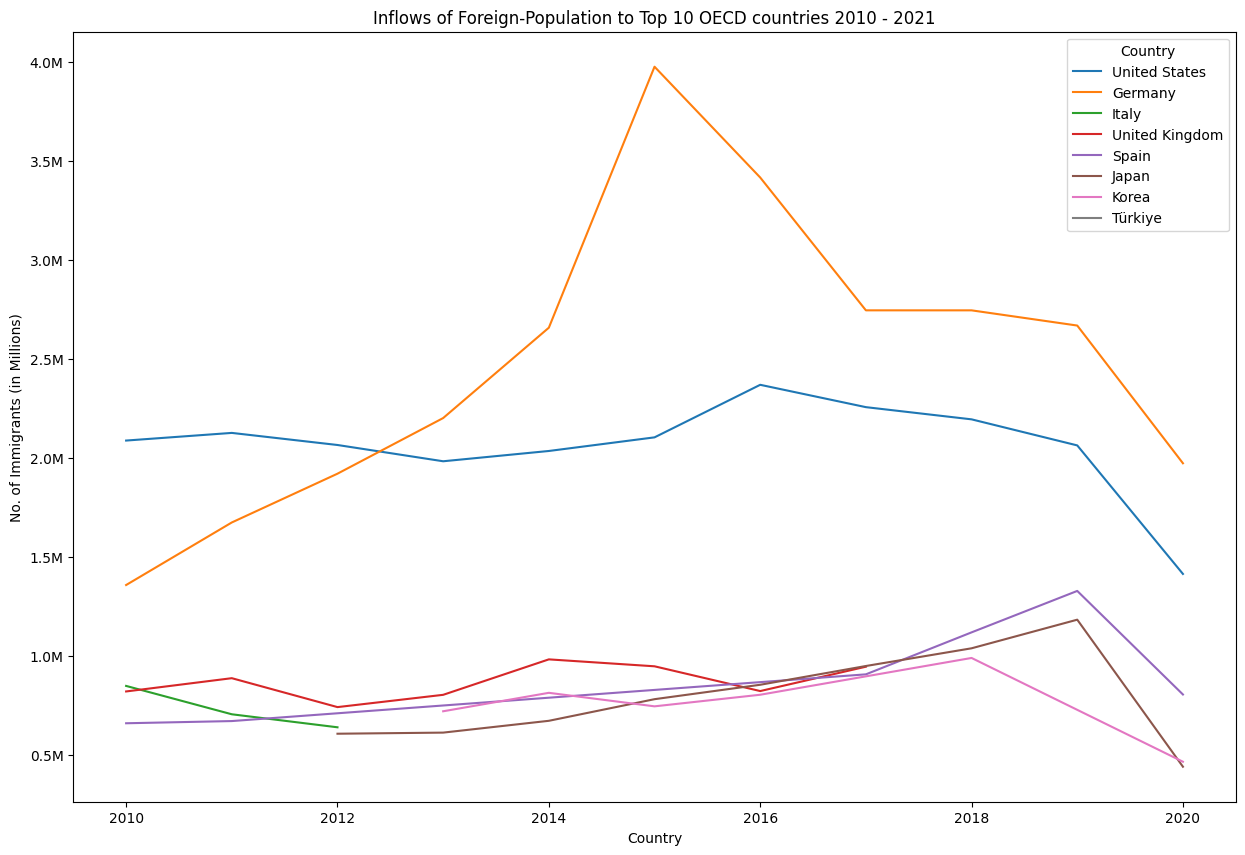

In [30]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=result, x='Year', y='Value', hue='Country', ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Inflows of Foreign-Population to Top 10 OECD countries 2010 - 2021")
plt.show()

Which are the top 5 OECD countries that have had the highest immigrants outflows  rates?  How are the nationality acquisition rates behaving?

In [31]:
outflows = data.copy().set_index('Variable')
outflows = outflows.loc[['Outflows of foreign population by nationality']]
outflows = outflows[outflows['Year'] == 2020]
outflows

,Country of birth/nationality,VAR,Country,Year,Value
Variable,,,,,
Outflows of foreign population by nationality,Afghanistan,B12,Austria,2020,1335.0
Outflows of foreign population by nationality,Afghanistan,B12,Belgium,2020,578.0
Outflows of foreign population by nationality,Afghanistan,B12,Czech Republic,2020,52.0
Outflows of foreign population by nationality,Afghanistan,B12,Denmark,2020,35.0
Outflows of foreign population by nationality,Afghanistan,B12,Finland,2020,13.0
...,...,...,...,...,...
Outflows of foreign population by nationality,Marshall Islands,B12,Latvia,2020,0.0
Outflows of foreign population by nationality,Panama,B12,Latvia,2020,0.0
Outflows of foreign population by nationality,Hungary,B12,Latvia,2020,0.0


In [32]:
outflows1 = outflows[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = ['sum'] )
            

outflows2 = outflows1.sort_values(by = ('sum', 'Value'), ascending=False).iloc[0:5]
outflows2

,,sum
,,Value
Country,Year,
Germany,2020,1487220.0
Korea,2020,723034.0
Spain,2020,354246.0
Japan,2020,345922.0
Austria,2020,158350.0


In [33]:
def top_5_outflows (data, year= int):

    
    outflows = data.copy().set_index('Variable')
    outflows = outflows.loc[['Outflows of foreign population by nationality']]
    outflows = outflows[outflows['Year'] == year]

       

    outflows1 = outflows[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
            

    outflows2 = outflows1.sort_values(by = ('Value', 'sum'), ascending=False).iloc[0:5]
    outflows2

    

    return outflows2

In [34]:
data_out_1 = top_5_outflows (data, 2010)
data_out_1


,,Value
,,sum
Country,Year,
Germany,2010,1054083.0
Spain,2010,726374.0
Japan,2010,485173.0
United Kingdom,2010,437000.0
Korea,2010,392133.0


In [35]:
data_out_2 = top_5_outflows (data, 2011)
data_out_2

,,Value
,,sum
Country,Year,
Germany,2011,1073308.0
Spain,2011,706950.0
Japan,2011,461608.0
Korea,2011,435375.0
United Kingdom,2011,363000.0


In [36]:
data_out_3 = top_5_outflows (data, 2012)
data_out_3

,,Value
,,sum
Country,Year,
Germany,2012,1152343.0
Spain,2012,778539.0
Korea,2012,580063.0
Japan,2012,438847.0
United Kingdom,2012,318000.0


In [37]:
data_out_4 = top_5_outflows (data, 2013)
data_out_4

,,Value
,,sum
Country,Year,
Germany,2013,1308848.0
Spain,2013,917722.0
Korea,2013,536161.0
Japan,2013,426456.0
United Kingdom,2013,321000.0


In [38]:
data_out_5 = top_5_outflows (data, 2014)
data_out_5

,,Value
,,sum
Country,Year,
Germany,2014,1523059.0
Spain,2014,639823.0
Korea,2014,541030.0
Japan,2014,425682.0
United Kingdom,2014,326000.0


In [39]:
data_out_6 = top_5_outflows (data, 2015)
data_out_6

,,Value
,,sum
Country,Year,
Germany,2015,1693948.0
Korea,2015,602001.0
Spain,2015,498371.0
Japan,2015,446864.0
United Kingdom,2015,315000.0


In [40]:
data_out_7 = top_5_outflows (data, 2016)
data_out_7

,,Value
,,sum
Country,Year,
Germany,2016,2142737.0
Korea,2016,649909.0
Spain,2016,474890.0
Japan,2016,466805.0
United Kingdom,2016,323000.0


In [41]:
data_out_8 = top_5_outflows (data, 2017)
data_out_8

,,Value
,,sum
Country,Year,
Germany,2017,1759503.0
Korea,2017,697393.0
Spain,2017,563817.0
Japan,2017,518151.0
Türkiye,2017,391166.0


In [42]:
data_out_9 = top_5_outflows (data, 2018)
data_out_9

,,Value
,,sum
Country,Year,
Germany,2018,1838719.0
Korea,2018,730194.0
Japan,2018,583835.0
Türkiye,2018,510560.0
Spain,2018,460354.0


In [43]:
data_out_10 = top_5_outflows (data, 2019)
data_out_10

,,Value
,,sum
Country,Year,
Germany,2019,1915351.0
Korea,2019,851081.0
Japan,2019,666779.0
Türkiye,2019,488577.0
Spain,2019,439703.0


In [44]:
data_out_11= top_5_outflows (data, 2020)
data_out_11

,,Value
,,sum
Country,Year,
Germany,2020,1487220.0
Korea,2020,723034.0
Spain,2020,354246.0
Japan,2020,345922.0
Austria,2020,158350.0


In [45]:
dfs = [data_out_1, data_out_2, data_out_3, data_out_4, data_out_5, data_out_6, data_out_7, data_out_8, data_out_9, data_out_10, data_out_11]

result_out = pd.concat(dfs).reset_index()

result_out

,Country,Year,Value
,,,sum
0,Germany,2010,1054083.0
1,Spain,2010,726374.0
2,Japan,2010,485173.0
3,United Kingdom,2010,437000.0
4,Korea,2010,392133.0
5,Germany,2011,1073308.0
6,Spain,2011,706950.0
7,Japan,2011,461608.0
8,Korea,2011,435375.0


In [46]:
result_out.columns = result_out.columns.droplevel(1)

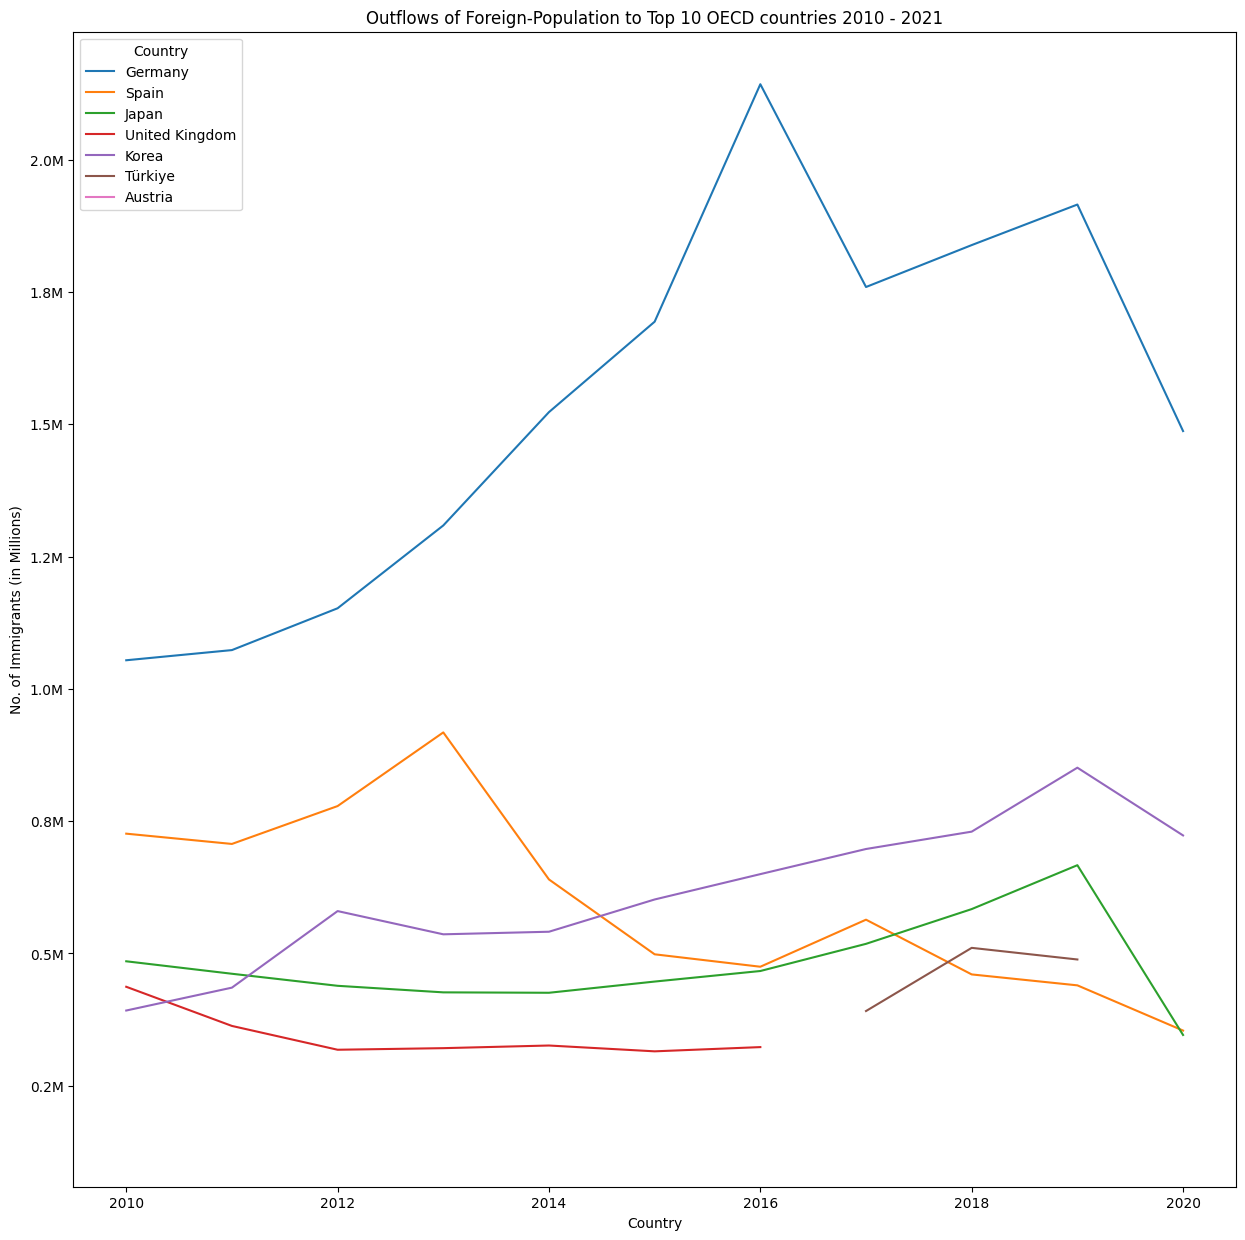

In [47]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(data=result_out, x='Year', y='Value', hue='Country', ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Outflows of Foreign-Population to Top 10 OECD countries 2010 - 2021")
plt.show()

In [48]:
data['Variable'].value_counts()

Variable
Inflows of foreign population by nationality                   106723
Acquisition of nationality by country of former nationality     97573
Stock of foreign population by nationality                      84693
Outflows of foreign population by nationality                   76475
Stock of foreign-born population by country of birth            74054
Name: count, dtype: int64

In [49]:
def top_5_nationalisation (data, year= int):

    
    nationalisation = data.copy().set_index('Variable')
    nationalisation = nationalisation.loc[['Acquisition of nationality by country of former nationality']]
    nationalisation = nationalisation[nationalisation['Year'] == year]

       

    nationalisation1 = nationalisation[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
            

    nationalisation2 = nationalisation1.sort_values(by = ('Value','sum'), ascending=False).iloc[0:5]
    nationalisation2

    

    return nationalisation2

In [50]:
data_nat_1 = top_5_nationalisation(data, 2010)
data_nat_1

,,Value
,,sum
Country,Year,
United States,2010,1241956.0
United Kingdom,2010,387181.0
Canada,2010,287136.0
France,2010,286317.0
Spain,2010,247411.0


In [51]:
data_nat_2 = top_5_nationalisation(data, 2011)
data_nat_2

,,Value
,,sum
Country,Year,
United States,2011,1390457.0
Canada,2011,358885.0
United Kingdom,2011,352916.0
Spain,2011,229154.0
France,2011,228997.0


In [52]:
data_nat_3 = top_5_nationalisation(data, 2012)
data_nat_3

,,Value
,,sum
Country,Year,
United States,2012,1516756.0
United Kingdom,2012,386319.0
Spain,2012,231118.0
Canada,2012,223835.0
Germany,2012,221356.0


In [53]:
data_nat_4 = top_5_nationalisation(data, 2013)
data_nat_4

,,Value
,,sum
Country,Year,
United States,2013,1561536.0
Spain,2013,451570.0
United Kingdom,2013,414409.0
Canada,2013,254911.0
Australia,2013,246084.0


In [54]:
data_nat_5 = top_5_nationalisation(data, 2014)
data_nat_5

,,Value
,,sum
Country,Year,
United States,2014,1308379.0
Canada,2014,518479.0
Spain,2014,411753.0
Australia,2014,324900.0
Italy,2014,257844.0


In [55]:
data_nat_6 = top_5_nationalisation(data, 2015)
data_nat_6

,,Value
,,sum
Country,Year,
United States,2015,1461928.0
Canada,2015,502152.0
Italy,2015,353461.0
Australia,2015,272043.0
United Kingdom,2015,235406.0


In [56]:
data_nat_7 = top_5_nationalisation(data, 2016)
data_nat_7

,,Value
,,sum
Country,Year,
United States,2016,1507460.0
Italy,2016,399582.0
Spain,2016,301796.0
United Kingdom,2016,297548.0
Canada,2016,294427.0


In [57]:
data_nat_8 = top_5_nationalisation(data, 2017)
data_nat_8

,,Value
,,sum
Country,Year,
United States,2017,1415753.0
Italy,2017,290750.0
Australia,2017,275489.0
United Kingdom,2017,245604.0
France,2017,229917.0


In [58]:
data_nat_9 = top_5_nationalisation(data, 2018)
data_nat_9

,,Value
,,sum
Country,Year,
United States,2018,1525311.0
Canada,2018,352616.0
United Kingdom,2018,313005.0
Italy,2018,222881.0
Germany,2018,220845.0


In [59]:
data_nat_10 = top_5_nationalisation(data, 2019)
data_nat_10

,,Value
,,sum
Country,Year,
United States,2019,1686592.0
Canada,2019,500357.0
United Kingdom,2019,317722.0
Australia,2019,255322.0
Germany,2019,254000.0


In [60]:
data_nat_11 = top_5_nationalisation(data, 2020)
data_nat_11

,,Value
,,sum
Country,Year,
United States,2020,1256349.0
Australia,2020,409105.0
Italy,2020,261390.0
United Kingdom,2020,259861.0
Spain,2020,252486.0


In [61]:
dfs = [data_nat_1, data_nat_2, data_nat_3, data_nat_4, data_nat_5, data_nat_6, data_nat_7, data_nat_8, data_nat_9, data_nat_10, data_nat_11]

result_nat = pd.concat(dfs).reset_index()

result_nat

,Country,Year,Value
,,,sum
0,United States,2010,1241956.0
1,United Kingdom,2010,387181.0
2,Canada,2010,287136.0
3,France,2010,286317.0
4,Spain,2010,247411.0
5,United States,2011,1390457.0
6,Canada,2011,358885.0
7,United Kingdom,2011,352916.0
8,Spain,2011,229154.0


In [62]:
result_nat.columns = result_nat.columns.droplevel(1)

In [63]:
result_nat

,Country,Year,Value
0,United States,2010,1241956.0
1,United Kingdom,2010,387181.0
2,Canada,2010,287136.0
3,France,2010,286317.0
4,Spain,2010,247411.0
5,United States,2011,1390457.0
6,Canada,2011,358885.0
7,United Kingdom,2011,352916.0
8,Spain,2011,229154.0
9,France,2011,228997.0


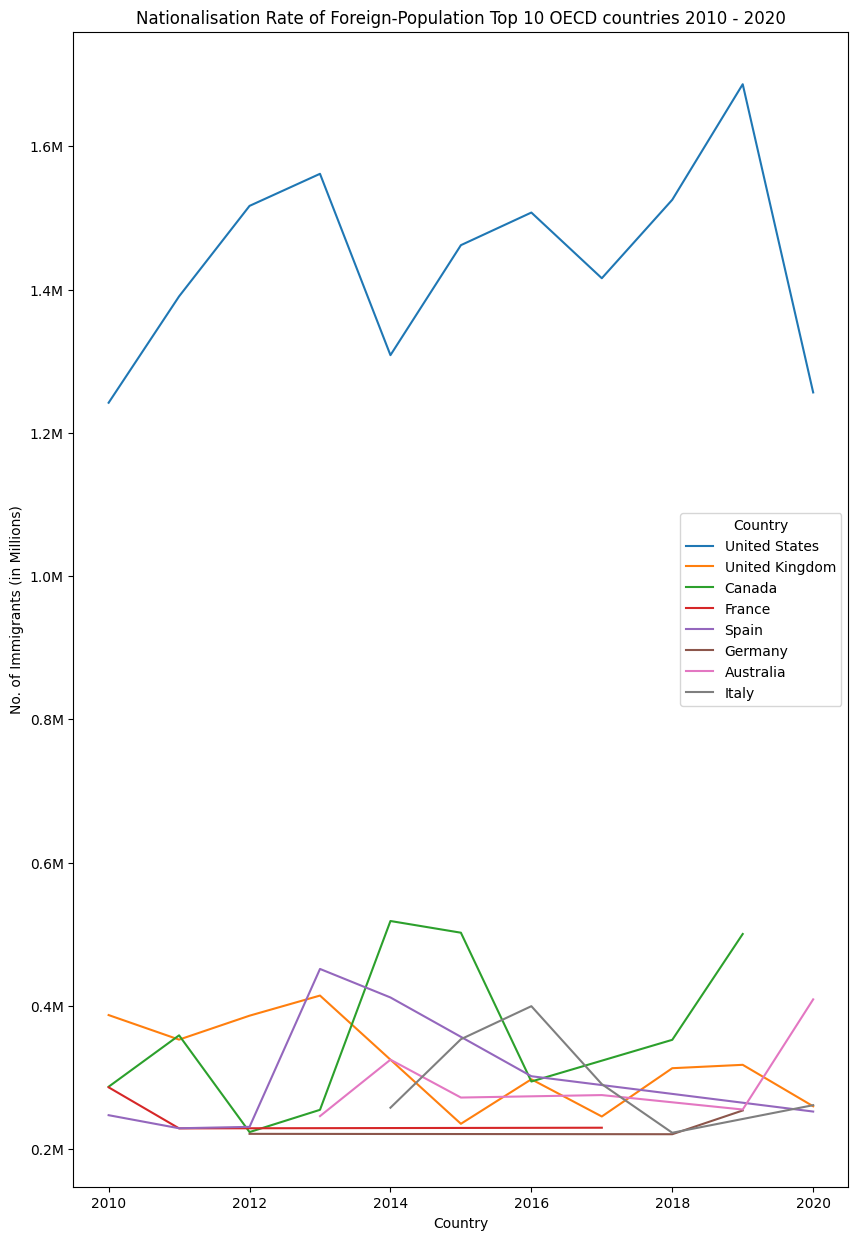

In [64]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(10, 15))
sns.lineplot(data=result_nat, x='Year', y='Value', hue='Country', ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Nationalisation Rate of Foreign-Population Top 10 OECD countries 2010 - 2020")
plt.show()

In [173]:
data['Variable'].value_counts()

Variable
Inflows of foreign population by nationality                   106723
Acquisition of nationality by country of former nationality     97573
Stock of foreign population by nationality                      84693
Outflows of foreign population by nationality                   76475
Stock of foreign-born population by country of birth            74054
Name: count, dtype: int64

In [67]:
ratio_immi = data.copy().set_index('Variable')
ratio_immi = ratio_immi.loc[['Stock of foreign-born population by country of birth']]
ratio_immi = ratio_immi[ratio_immi['Year'] == 2019]
ratio_immi

,Country of birth/nationality,VAR,Country,Year,Value
Variable,,,,,
Stock of foreign-born population by country of birth,Afghanistan,B14,Australia,2019,62560.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Austria,2019,43073.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Belgium,2019,24224.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Czech Republic,2019,455.0
Stock of foreign-born population by country of birth,Afghanistan,B14,Denmark,2019,13771.0
...,...,...,...,...,...
Stock of foreign-born population by country of birth,Venezuela,B14,Türkiye,2019,290.0
Stock of foreign-born population by country of birth,Viet Nam,B14,Türkiye,2019,208.0
Stock of foreign-born population by country of birth,Yemen,B14,Türkiye,2019,14778.0


In [116]:
ratio_immi1 = ratio_immi.groupby(['Country', 'Year']).agg({'Value':'sum'})
# ratio_immi1 = ratio_immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
ratio_immi1

,,Value
Country,Year,
Australia,2019,15048170.0
Austria,2019,3424318.0
Belgium,2019,3946808.0
Chile,2019,2459206.0
Czech Republic,2019,1012055.0
Denmark,2019,1210533.0
Estonia,2019,396107.0
Finland,2019,773549.0
France,2019,16715599.0


In [112]:
def top_5_ratio_immi_fbp (data, year= int):

    
    ratio_immi = data.copy().set_index('Variable')
    ratio_immi = ratio_immi.loc[['Stock of foreign-born population by country of birth']]
    ratio_immi = ratio_immi[ratio_immi['Year'] == year]

       

    ratio_immi1 = ratio_immi[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
            

    ratio_immi2 = ratio_immi1.sort_values(by = ('Value', 'sum'), ascending=False).iloc[0:5]
    ratio_immi2

    

    return ratio_immi2

In [113]:
def top_5_ratio_immi_fp (data, year= int):

    
    ratio_immi_fp = data.copy().set_index('Variable')
    ratio_immi_fp = ratio_immi_fp.loc[['Stock of foreign population by nationality']]
    ratio_immi_fp = ratio_immi_fp[ratio_immi_fp['Year'] == year]

       

    ratio_immi_fp1 = ratio_immi_fp[[ 'Country', 'Year', 'Value']].pivot_table(index=[ 'Country', 'Year'], aggfunc = {'sum'} )
            

    ratio_immi_fp2 = ratio_immi_fp1.sort_values(by = ('Value', 'sum'), ascending=False).iloc[0:5]
    ratio_immi_fp2

    

    return ratio_immi_fp2

In [114]:
top_5_ratio_immi_fbp(data, 2010)

,,Value
,,sum
Country,Year,
United States,2010,79132318.0
Germany,2010,19819000.0
France,2010,14574942.0
United Kingdom,2010,13393000.0
Spain,2010,12558263.0


In [109]:
top_5_ratio_immi_fp(data, 2010)

,,Value
,,sum
Country,Year,
United States,2010,42992288.0
Germany,2010,13305481.0
Spain,2010,10804102.0
United Kingdom,2010,8506000.0
France,2010,7642872.0


In [110]:
top_5_ratio_immi_fbp(data, 2011)

,,Value
,,sum
Country,Year,
United States,2011,80023568.0
Germany,2011,20596000.0
France,2011,14744717.0
United Kingdom,2011,14084000.0
Canada,2011,13538130.0


In [334]:
top_5_ratio_immi_fp(data, 2011)

,,Value
,,sum
Country,Year,
United States,2011,44592143.0
Germany,2011,13398420.0
Spain,2011,10623857.0
United Kingdom,2011,9077994.0
France,2011,7785618.0


In [74]:
top_5_ratio_immi_fbp(data, 2012)

,,Value
,,sum
Country,Year,
United States,2012,81030126.0
Germany,2012,19141000.0
France,2012,14948657.0
United Kingdom,2012,14323269.0
Spain,2012,12588039.0


In [75]:
top_5_ratio_immi_fp(data, 2012)

,,Value
,,sum
Country,Year,
United States,2012,44139415.0
Germany,2012,13724888.0
Spain,2012,10471055.0
United Kingdom,2012,9036510.0
Italy,2012,8072096.0


In [76]:
top_5_ratio_immi_fbp(data, 2013)

,,Value
,,sum
Country,Year,
United States,2013,82241941.0
Germany,2013,19724000.0
France,2013,15181198.0
United Kingdom,2013,14843481.0
Australia,2013,12806280.0


In [77]:
top_5_ratio_immi_fp(data, 2013)

,,Value
,,sum
Country,Year,
United States,2013,44009146.0
Germany,2013,14270353.0
Spain,2013,10144176.0
United Kingdom,2013,9334552.0
Italy,2013,8731178.0


In [78]:
top_5_ratio_immi_fbp(data, 2014)

,,Value
,,sum
Country,Year,
United States,2014,83499345.0
Germany,2014,20395000.0
France,2014,15429496.0
United Kingdom,2014,15096000.0
Australia,2014,13128430.0


In [79]:
top_5_ratio_immi_fp(data, 2014)

,,Value
,,sum
Country,Year,
United States,2014,43806997.0
Germany,2014,15096419.0
United Kingdom,2014,9865000.0
Italy,2014,9803866.0
Spain,2014,9352855.0


In [80]:
top_5_ratio_immi_fbp(data, 2015)

,,Value
,,sum
Country,Year,
United States,2015,85398277.0
Germany,2015,21135000.0
United Kingdom,2015,16006000.0
France,2015,15694131.0
Australia,2015,13446270.0


In [81]:
top_5_ratio_immi_fp(data, 2015)

,,Value
,,sum
Country,Year,
United States,2015,44304151.0
Germany,2015,16120315.0
United Kingdom,2015,10728000.0
Italy,2015,9981623.0
Spain,2015,8907261.0


In [82]:
top_5_ratio_immi_fbp(data, 2016)

,,Value
,,sum
Country,Year,
United States,2016,86194107.0
Germany,2016,21991000.0
United Kingdom,2016,17100000.0
France,2016,16041488.0
Canada,2016,13959010.0


In [83]:
top_5_ratio_immi_fp(data, 2016)

,,Value
,,sum
Country,Year,
United States,2016,44613697.0
Germany,2016,18006159.0
United Kingdom,2016,11414001.0
Italy,2016,10009681.0
France,2016,9081700.0


In [84]:
top_5_ratio_immi_fbp(data, 2017)

,,Value
,,sum
Country,Year,
United States,2017,87711774.0
Germany,2017,24297000.0
United Kingdom,2017,17976000.0
France,2017,16255915.0
Australia,2017,14262880.0


In [85]:
top_5_ratio_immi_fp(data, 2017)

,,Value
,,sum
Country,Year,
United States,2017,44589388.0
Germany,2017,19874120.0
United Kingdom,2017,11803000.0
Italy,2017,10051869.0
France,2017,9405900.0


In [86]:
top_5_ratio_immi_fbp(data, 2018)

,,Value
,,sum
Country,Year,
United States,2018,88082062.0
Germany,2018,25014000.0
United Kingdom,2018,18114000.0
France,2018,16433690.0
Australia,2018,14650670.0


In [87]:
top_5_ratio_immi_fp(data, 2018)

,,Value
,,sum
Country,Year,
United States,2018,22595700.0
Germany,2018,21038255.0
United Kingdom,2018,11414000.0
Italy,2018,10248383.0
Spain,2018,9122818.0


In [88]:
top_5_ratio_immi_fbp(data, 2019)

,,Value
,,sum
Country,Year,
United States,2019,88568717.0
Germany,2019,25734000.0
United Kingdom,2019,17745000.0
France,2019,16715599.0
Australia,2019,15048170.0


In [89]:
top_5_ratio_immi_fp(data, 2019)

,,Value
,,sum
Country,Year,
United States,2019,22518800.0
Germany,2019,21611650.0
Italy,2019,9952597.0
Spain,2019,9677580.0
United Kingdom,2019,6227000.0


In [90]:
top_5_ratio_immi_fbp(data, 2020)

,,Value
,,sum
Country,Year,
United States,2020,84279499.0
Germany,2020,26134000.0
United Kingdom,2020,17249000.0
France,2020,16939883.0
Australia,2020,15291750.0


In [91]:
fp = top_5_ratio_immi_fp(data, 2020)
fp

,,Value
,,sum
Country,Year,
Germany,2020,22223395.0
United States,2020,21433675.0
Spain,2020,10451454.0
Italy,2020,10040524.0
Japan,2020,5866220.0


In [92]:
fp.columns = fp.columns.droplevel(1)

In [93]:
fp.columns

Index(['Value'], dtype='object')

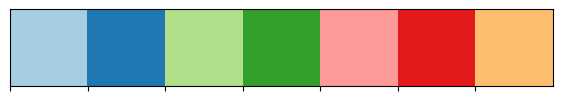

In [361]:
custom_palette = sns.color_palette("Paired", 7)
sns.palplot(custom_palette)

C:\Users\chech\AppData\Local\Temp\ipykernel_14064\4262496499.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y= 'Value', data= fp, palette=custom_palette_2, ax=ax)
C:\Users\chech\AppData\Local\Temp\ipykernel_14064\4262496499.py:11: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x='Country', y= 'Value', data= fp, palette=custom_palette_2, ax=ax)


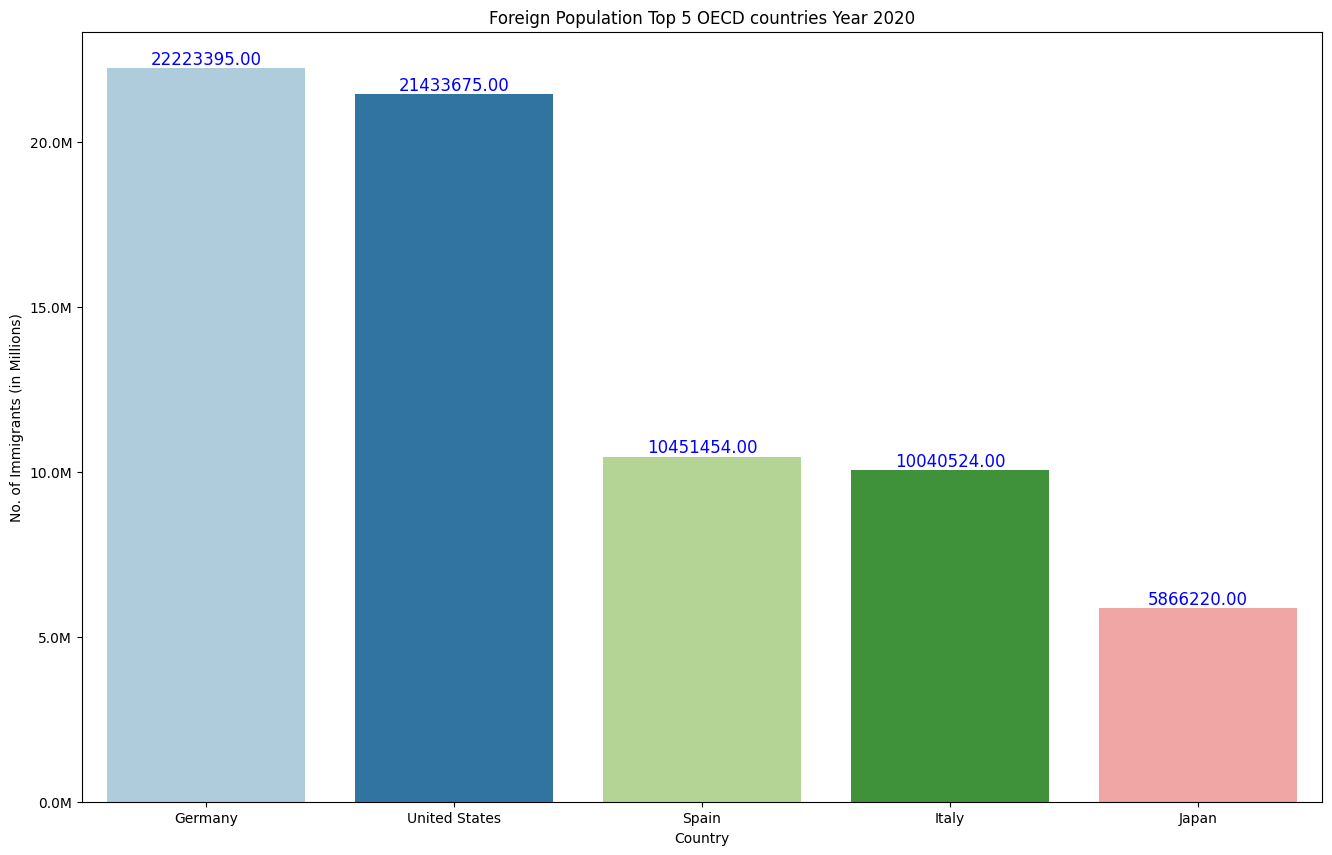

In [368]:
import matplotlib.ticker as mtick

# Function to format y-axis labels
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Create a formatter
formatter = mtick.FuncFormatter(millions)

fig, ax = plt.subplots( figsize=(16,10))
sns.barplot(x='Country', y= 'Value', data= fp, palette=custom_palette_2, ax=ax)
ax.yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
ax.set_xlabel("Country")
ax.set_ylabel("No. of Immigrants (in Millions)")
ax.set_title("Foreign Population Top 5 OECD countries Year 2020")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')

plt.show()